In [108]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings("ignore")


In [33]:
#данные о состоянии воздуха
df = pd.read_csv('e:/DS/data/air/AirQualityUCI.csv',  sep=';')

In [38]:
df.head(30)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,datetime
0,2004-03-10,18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN,2004-03-10 19:00:00
2,2004-03-10,20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN,2004-03-10 20:00:00
3,2004-03-10,21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN,2004-03-10 21:00:00
4,2004-03-10,22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN,2004-03-10 22:00:00
5,2004-03-10,23:00:00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN,2004-03-10 23:00:00
6,2004-03-11,00:00:00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN,2004-03-11 00:00:00
7,2004-03-11,01:00:00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN,2004-03-11 01:00:00
8,2004-03-11,02:00:00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN,2004-03-11 02:00:00
9,2004-03-11,03:00:00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN,2004-03-11 03:00:00


In [7]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568",NaN,NaN
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",NaN,NaN
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",NaN,NaN
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",NaN,NaN
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028",NaN,NaN


In [34]:
df  = df[df['Date'].notnull()]


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 18 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
datetime         9357 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(11), object(5)
memory usage: 1.4+ MB


In [36]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S.%f')
df['Date']  = df['Date'].str.replace('/','-')
df['Time'] = df['Time'].str.replace('.',':')


In [37]:
df['datetime']  = df['Date'] + ' ' + df['Time']
df['datetime']  = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M:%S')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [39]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.').astype('float')
df['CO(GT)'].fillna(value=0, inplace=True)


In [40]:
df.to_csv('t.csv', sep=';')
df2 = pd.read_csv('t.csv',  sep=';',  index_col='datetime')


In [41]:
df2 = df2[(df2['Time']!='04:00:00')]

In [42]:
df2 =  df2[(df2['CO(GT)']>=0)]

In [43]:
#cols = ['CO(GT)']
#ts = df2[(df2['Date']>='2004-03-11') & (df2['Date']<='2004-03-14')][cols]


In [305]:
#df[df['CO(GT)']<-10]
#df[(df['Date']>='2004-03-11') & (df['Date']<='2004-03-12')]

In [44]:
# возьмем данные в одно и тоже время суток
cols = ['CO(GT)']
ts2 = df2[(df2['Time']=='03:00:00') ][cols]

In [140]:
ts2.head()

,CO(GT)
datetime,
2004-03-11 03:00:00,0.6
2004-03-12 03:00:00,0.8
2004-03-13 03:00:00,1.7
2004-03-14 03:00:00,2.4
2004-03-15 03:00:00,1.1


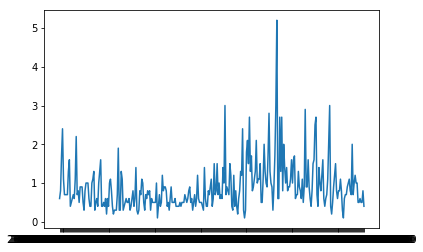

In [46]:
plt.plot(ts2)

In [47]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    


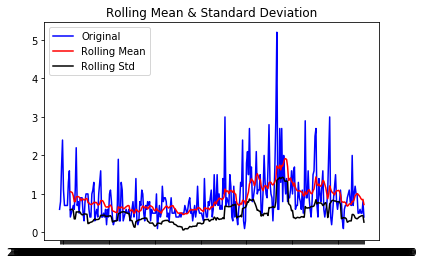

Results of Dickey-Fuller Test:
Test Statistic                  -2.519333
p-value                          0.110841
#Lags Used                      10.000000
Number of Observations Used    301.000000
Critical Value (1%)             -3.452263
Critical Value (5%)             -2.871191
Critical Value (10%)            -2.571912
dtype: float64


In [48]:
#проверим ряд на стационарность
test_stationarity(ts2)

Test Statistic меньше Critical Value, значит ряд стационарный с вероятностью 0,89

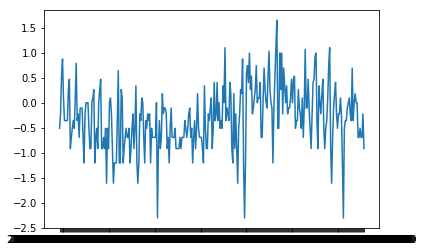

In [50]:
#логорифмируем, сглаживаем
ts_log = np.log(ts2)
plt.plot(ts_log)

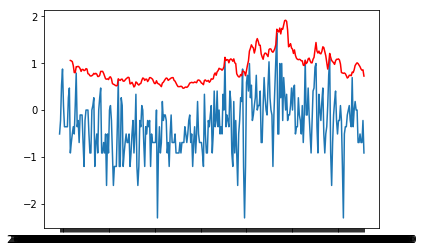

In [51]:
# посмотри тренд 
moving_avg = ts2.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Тренда нет

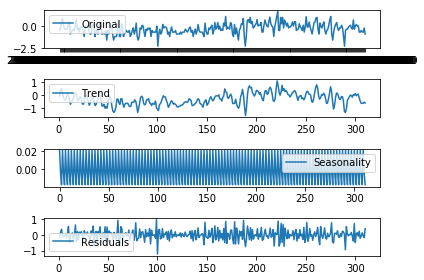

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

#decomposition = seasonal_decompose(ts_log)
decomposition = seasonal_decompose(np.asarray(ts_log), freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [61]:
len(ts_log)


312

In [63]:
from statsmodels.tsa.stattools import acf, pacf

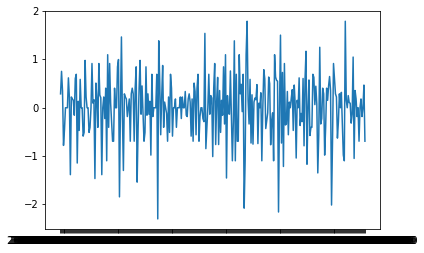

In [64]:
#рассмотрим разницу между ближайщими днями
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

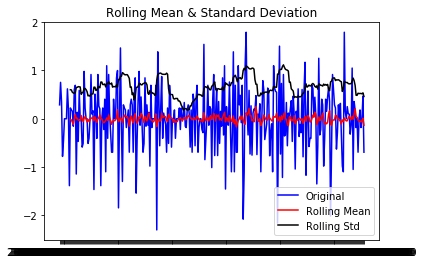

Results of Dickey-Fuller Test:
Test Statistic                -1.014097e+01
p-value                        8.422655e-18
#Lags Used                     9.000000e+00
Number of Observations Used    3.010000e+02
Critical Value (1%)           -3.452263e+00
Critical Value (5%)           -2.871191e+00
Critical Value (10%)          -2.571912e+00
dtype: float64


In [65]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Test Statistic   удалось еще уменьшить

In [67]:
lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

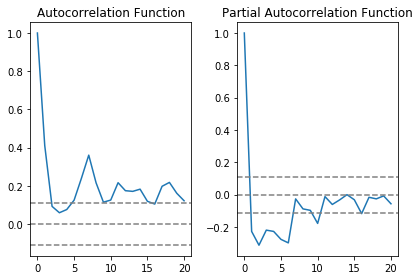

In [68]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Смотрим, где кривая пересекает верхний доверительный интервал первый раз.
для q - ACF, p - PACF

In [ ]:
q = 3
p = 2

In [69]:
from statsmodels.tsa.arima_model import ARIMA  # (p,d,q)

Text(0.5,1,'RSS: 86.8316')

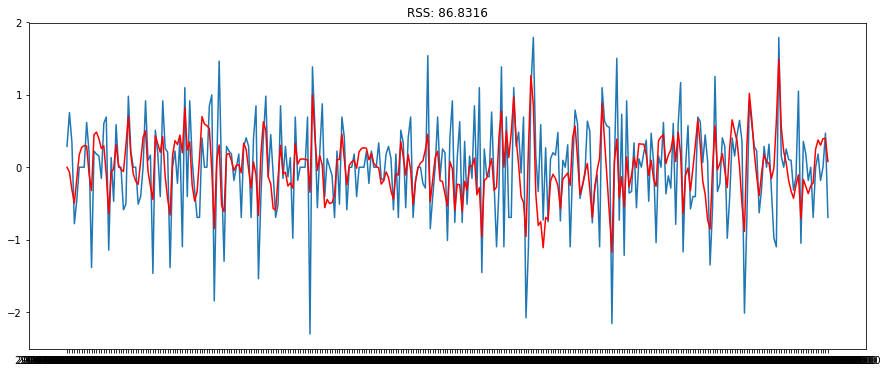

In [125]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff.T.squeeze())**2))


In [129]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

datetime
2004-03-12 03:00:00   -0.000857
2004-03-13 03:00:00   -0.067003
2004-03-14 03:00:00   -0.309455
2004-03-15 03:00:00   -0.494093
2004-03-16 03:00:00   -0.161265
dtype: float64


In [135]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

datetime
2004-03-12 03:00:00   -0.000857
2004-03-13 03:00:00   -0.067860
2004-03-14 03:00:00   -0.377315
2004-03-15 03:00:00   -0.871407
2004-03-16 03:00:00   -1.032672
dtype: float64


In [137]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

datetime
2004-03-11 03:00:00         NaN
2004-03-12 03:00:00   -0.000857
2004-03-13 03:00:00   -0.067860
2004-03-14 03:00:00   -0.377315
2004-03-15 03:00:00   -0.871407
dtype: float64

In [143]:
predictions_ARIMA.head()

datetime
2004-03-11 03:00:00         NaN
2004-03-12 03:00:00    0.999144
2004-03-13 03:00:00    0.934391
2004-03-14 03:00:00    0.685700
2004-03-15 03:00:00    0.418362
dtype: float64

Text(0.5,1,'RMSE: nan')

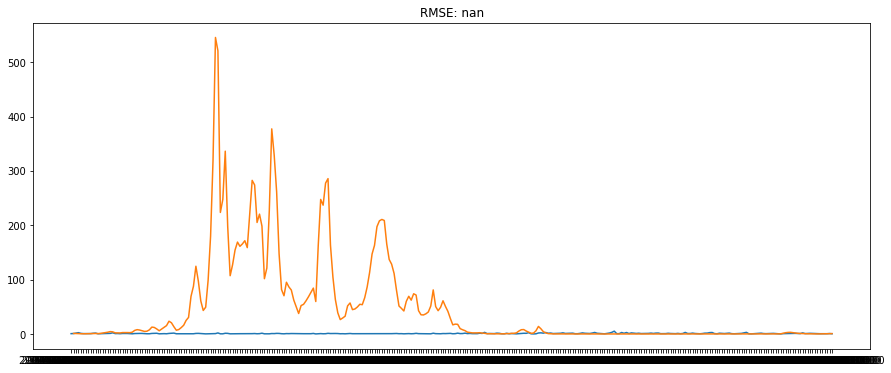

In [142]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts2.T.squeeze())**2)/len(ts2)))

Text(0.5,1,'RMSE: nan')

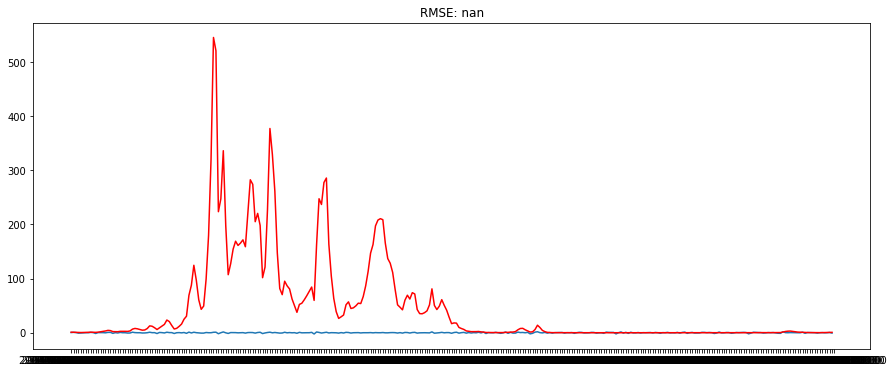

In [127]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_log_diff)
plt.plot(predictions_ARIMA, color='red')
plt.title("RMSE: %.4f" % np.sqrt(sum((predictions_ARIMA-ts2.T.squeeze())**2)/len(ts2)))

In [110]:
p = range(0, 4)
d = (1,)
q = range(0, 4)

from itertools import product

parameters = product(p, d, q)
parameters_list = list(parameters)
len(parameters_list)

16

In [120]:
for p, d, q in parameters_list:
    try:
        model = ARIMA(ts_log, order=(p, d, q))  
        results_ARIMA = model.fit(disp=-1)  
        rss = sum((results_ARIMA.fittedvalues - ts_log_diff.T.squeeze())**2)
        print('for p={}, d={}, q={} RSS is {}'.format(p, d, q, rss))
    except:
        pass   

for p=0, d=1, q=0 RSS is 135.0783677995285
for p=0, d=1, q=1 RSS is 99.57654479697555
for p=0, d=1, q=2 RSS is 89.52651508917516
for p=0, d=1, q=3 RSS is 89.31580357464111
for p=1, d=1, q=0 RSS is 128.10442126933427
for p=1, d=1, q=1 RSS is 91.98610270454742
for p=1, d=1, q=2 RSS is 89.40368103111425
for p=1, d=1, q=3 RSS is 88.70223606803948
for p=2, d=1, q=0 RSS is 115.62974557956717
for p=2, d=1, q=1 RSS is 88.16942740214758
for p=2, d=1, q=2 RSS is 86.83157375985239
for p=2, d=1, q=3 RSS is 86.83150369015368
for p=3, d=1, q=0 RSS is 110.08531615070945
for p=3, d=1, q=1 RSS is 87.68901402291038
for p=3, d=1, q=2 RSS is 86.83154967326236


Text(0.5,1,'RSS: 86.8315')

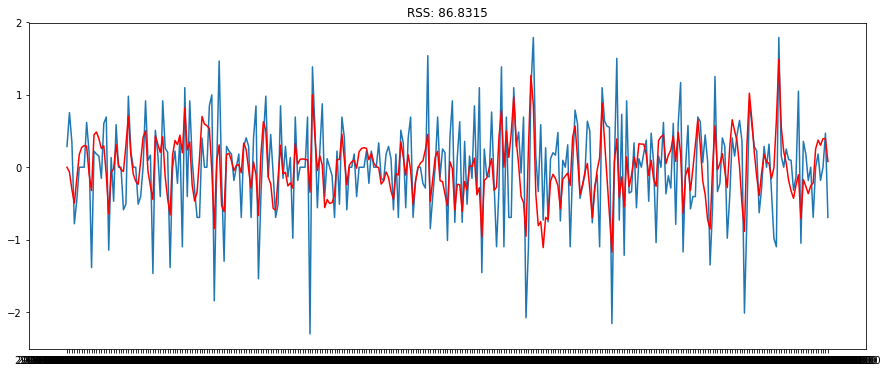

In [145]:
model = ARIMA(ts_log, order=(2, 1, 3))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff.T.squeeze())**2))

Text(0.5,1,'RMSE: nan')

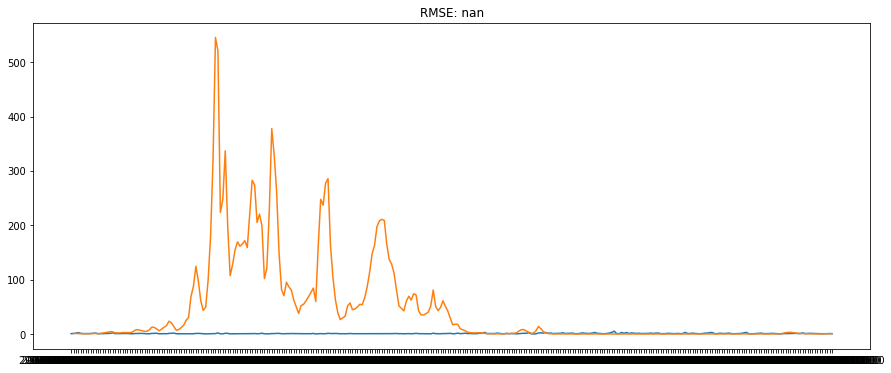

In [146]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts2.T.squeeze())**2)/len(ts2)))